DS12 python で iris データの階層型クラスタリング

In [ ]:
# google colab で実行する場合は以下のコメントアウトを外す
#! wget https://github.com/KHiraGit/sudspg_ds/raw/main/iris.csv

In [1]:
# ライブラリをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.preprocessing import StandardScaler

(150, 5)
(30, 5)


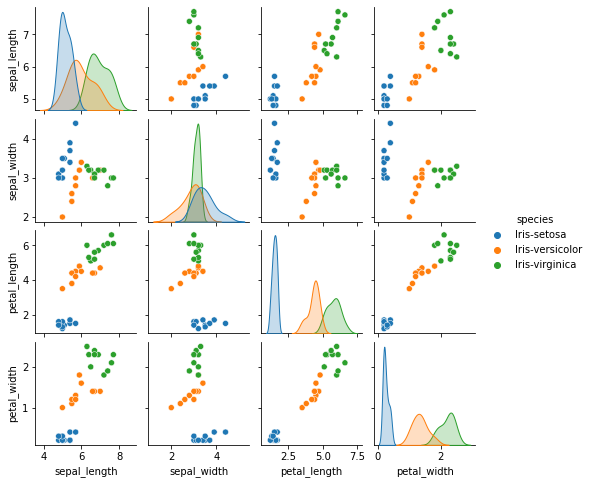

In [7]:
# irisデータ(csv形式)から読み込んでデータフレームを作成
iris_df = pd.read_csv('iris.csv')
print(iris_df.shape)
# データを5行間隔で間引く
iris_df = iris_df.loc[::5]
print(iris_df.shape)
# ペアプロットを表示
sns.pairplot(iris_df, hue='species', height=1.7)

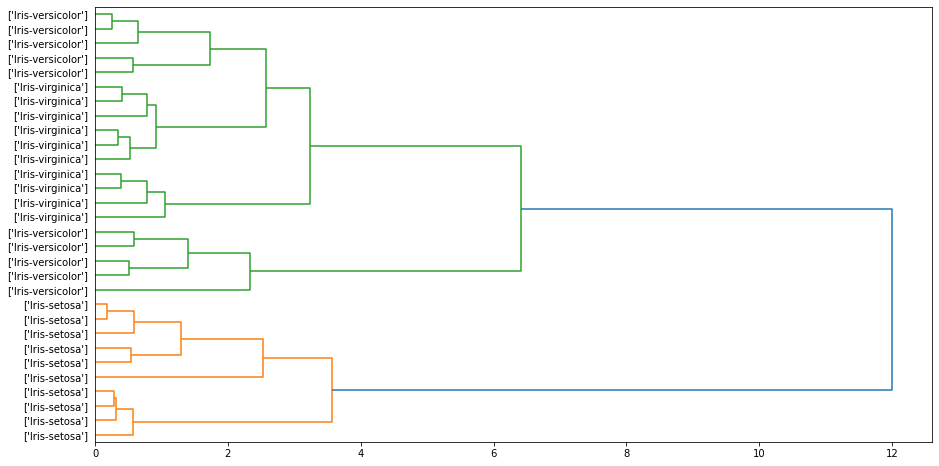

In [11]:
# クラスタリング用のデータとラベルを用意 
iris_data_df = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
iris_target_df = iris_df[['species']]
# データを正規化
scaler = StandardScaler()
iris_data_df = scaler.fit_transform(iris_data_df)
# クラスター間の距離を計算 (ユークリッド距離を利用)
dist = hierarchy.distance.pdist(iris_data_df, metric='euclidean')
# クラスターを統合 (ward法)
linkage = hierarchy.linkage(dist, method='ward', metric='euclidean') 
# デンドログラムを表示
fig, ax = plt.subplots(figsize=(15,8))
ax = hierarchy.dendrogram(Z=linkage, orientation='right', labels=iris_target_df.values.tolist())

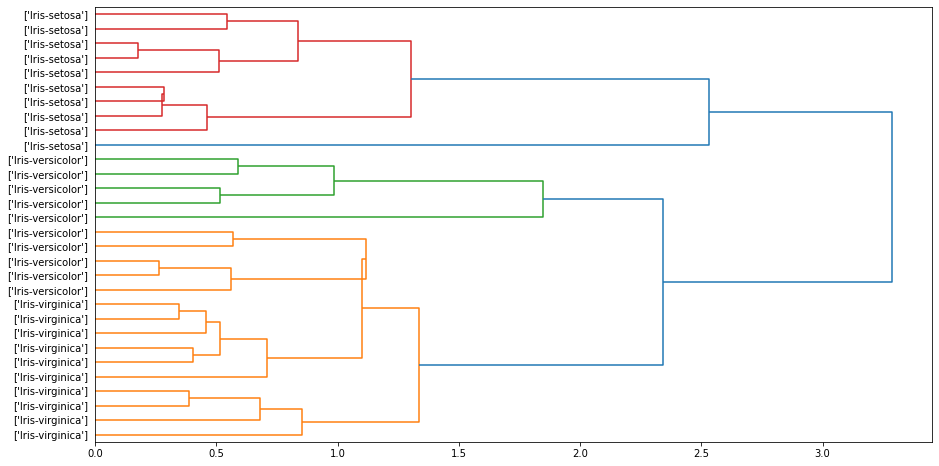

In [13]:
# クラスター間の距離を計算 (ユークリッド距離を利用)
dist = hierarchy.distance.pdist(iris_data_df, metric='euclidean')
# クラスターを統合 (重心法)
linkage = hierarchy.linkage(dist, method='centroid', metric='euclidean') 
# デンドログラムを表示
fig, ax = plt.subplots(figsize=(15,8))
ax = hierarchy.dendrogram(Z=linkage, orientation='right', labels=iris_target_df.values.tolist())

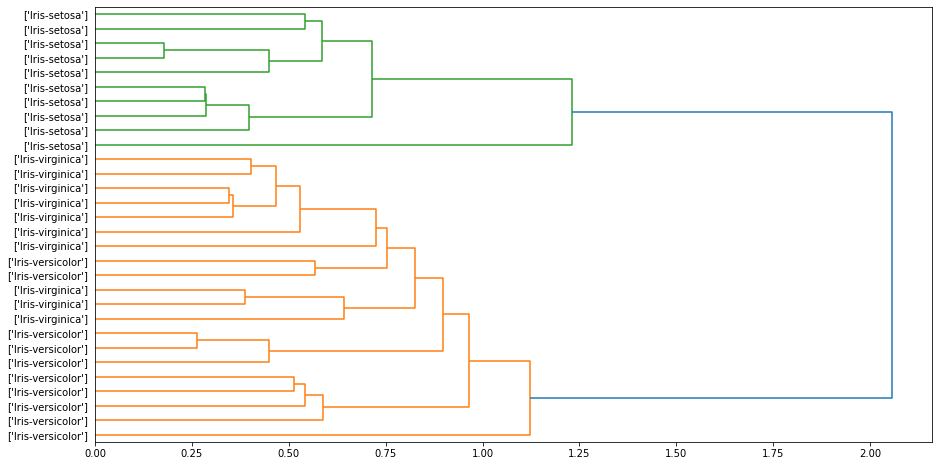

In [14]:
# クラスター間の距離を計算 (ユークリッド距離を利用)
dist = hierarchy.distance.pdist(iris_data_df, metric='euclidean')
# クラスターを統合 (最短距離法)
linkage = hierarchy.linkage(dist, method='single', metric='euclidean') 
# デンドログラムを表示
fig, ax = plt.subplots(figsize=(15,8))
ax = hierarchy.dendrogram(Z=linkage, orientation='right', labels=iris_target_df.values.tolist())